# Principal Component Analysis (PCA)

PCA merupakan salah satu model yang digunakan untuk mengekstrak fitur-fitur tersembunyi dari fitur-fitur yang ada pada suatu data.

## Dimensionality Reduction

Dalam memproses data, baik untuk membuat sebuah model machine learning ataupun eksplorasi, salah satu tantangan yang dihapadi adalah **jumlah dimensi/fitur** data yang sangat banyak. Semakin banyak fitur pada suatu data, semakin susah kita untuk membuat visualisasi terkait data tersebut. Semakin banyak fitur, semakin rentan model machine learning kita terhadap _overfitting_.

> Fenomena di atas sering disebut dengan istilah **curse of dimensionality**.

**Dimensionality Reduction** merupakan salah satu masalah _unsupervised learning_ yang bertujuan untuk, sesuai namanya, mengurangi dimensi suatu data. Dalam proses machine learning, proses ini sering kali disebut dengan **feature extraction**.


### Perbedaan dengan Feature Selection

Selain feature extraction, kita mungkin sering melakukan yang namanya **feature selection**, di mana kita memilih beberapa fitur yang akan digunakan untuk pemodelan atau analisis yang berdasarkan pengetahuan terhadap masalahnya atau hanya untuk tolak ukur awal.

Feature selection berbeda dengan feature extraction. Untuk feature selection, kita akan memilih untuk mengurangi fitur-fitur yang ada dalam data yang dirasa tidak diperlukan. Sedangkan, feature extraction, kita akan membuat sebuah model machine learning yang akan mengekstrak **latent feature** dari data tersebut.

Latent Feature/Variable
: Fitur/variabel yang tidak ada dalam daftar fitur data, tetapi merupakan fitur yang bisa merepresentasikan beberapa fitur pada data

Salah satu keunggulan dari feature extraction dibanding dengan feature selection adalah informasi yang ada dalam data akan tetap dipertahankan dalam fitur baru yang dihasilkan. Sedangkan, untuk feature selection, kita mungkin akan kehilangan suatu informasi (yang mungkin) penting dari membuang suatu fitur.


### Model untuk Feature Extraction

Ada banyak model unsupervised learning yang bisa digunakan untuk tujuan dimensionality reduction. Di antaranya adalah:
* Principal Component Analysis (PCA)
* Independent Componen Analysis (ICA)
* Singular Value Decomposition (SVD)
* dan lainnya


## How PCA Works

Secara umum, suatu data berdimensi `n` atau memiliki jumlah fitur sebanyak `n`, maka principal components yang bisa dihasilkan sebanyak `n`. Sebagai contoh, jika kita memiliki 2 fitur, maka jumlah principal components yang bisa dihasilkan juga sebanyak 2.

Algoritma PCA adalah sebagai berikut:
1. Standardisasi data sedemikian hingga setiap fitur berpusat pada rata-rata 0 dan standar deviasi 1
2. Dari titik pusat (0, 0), kita tentukan principal component pertama adalah komponen yang memiliki variance paling besar pada data
3. Tentukan principal component kedua dengan syarat bahwa principal component kedua **tidak berkorelasi** dengan principal component pertama. Sehingga, principal component kedua pasti tegak lurus dengan principal component pertama.
4. Lakukan langkah ketida untuk menemukan principal comopnent berikut yang juga tegak lurus terhadap principal component lainnya sampai terdapat `n` principal component, di mana `n` adalah jumlah fitur pada data.

Untuk lebih jelasnya, perhatikan ilustrasi berikut. Principal component pertama dari data di bawah ini adalah garis yang sejajar dengan garis ungu.

![](assets/gif/pca.gif)
([ref](https://builtin.com/data-science/step-step-explanation-principal-component-analysis))

Kita akan coba menggunakan data `ansur_male.csv` sebagai demo penggunaan PCA.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
ansur_hand_foot = pd.read_csv("data/ansur_male.csv")[["handlength", "footlength"]]
ansur_hand_foot.head()

,handlength,footlength
0,193,273
1,195,263
2,203,270
3,194,267
4,218,305


Jika kita plot setiap titik seperti di bawah ini, kita bisa melihat bahwa kedua fitur tersebut berkorelasi cukup tinggi. Sebelumnya, kita mungkin berpikir untuk menghapus salah satu fitur ini (berdasarkan korelasi terhadap variabel target untuk masalah supervised). Ini mungkin akan menyebabkan hilangnya informasi yang mungkin berguna dari fitur yang dihilangkan tersebut.

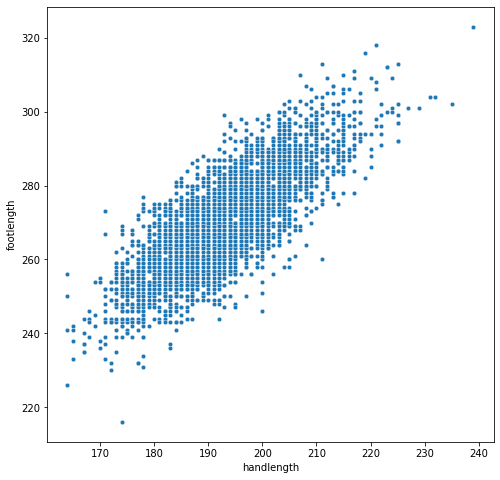

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x="handlength", y="footlength", data=ansur_hand_foot, s=20)
plt.show()

### Standardization

Langkah pertama untuk mengimplementasikan PCA adalah kita perlu melakukan standardisasi data terlebih dahulu. Kita bisa gunakan `StandardScaler` dari `scikit-learn`.

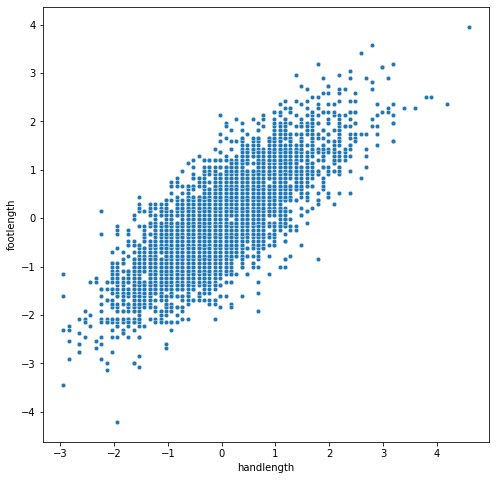

In [ ]:
scaler = StandardScaler()
sc_ansur_hand_foot = pd.DataFrame(
    scaler.fit_transform(ansur_hand_foot), columns=["handlength", "footlength"]
)

plt.figure(figsize=(8, 8))
sns.scatterplot(x="handlength", y="footlength", data=sc_ansur_hand_foot, s=20)
plt.show()

### Run PCA

Setelah dilakukan standardisasi data, kita gunakan `PCA` untuk mendapatkan **latent features** atau dalam hal ini disebut dengan **principal components**. Kita akan coba untuk membangkitkan 2 principal components.

In [ ]:
pca = PCA(random_state=11)
pc_ansur_hand_foot = pd.DataFrame(pca.fit_transform(ansur_hand_foot), columns=["pc1", "pc2"])
pc_ansur_hand_foot.head()

,pc1,pc2
0,1.327487,-1.278040
1,-5.685684,6.125705
2,4.647616,8.620281
3,-2.995822,3.000862
4,41.888371,0.675083


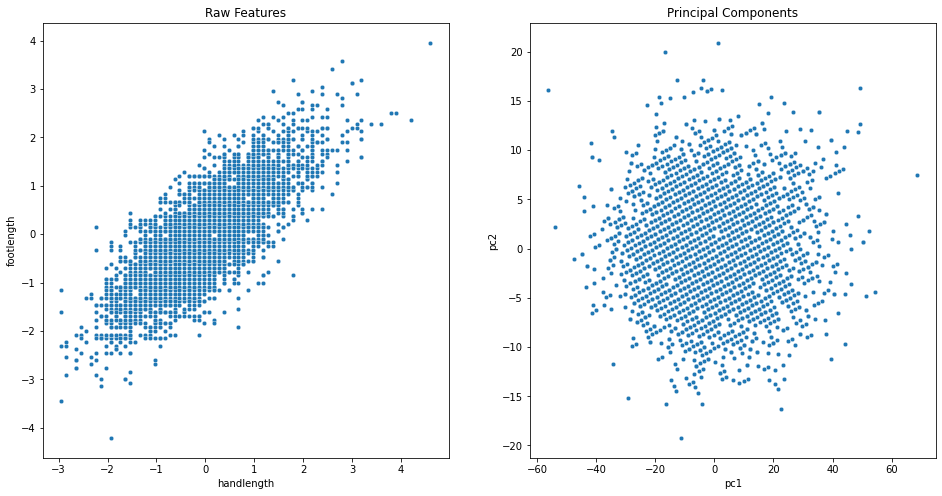

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.scatterplot(x="handlength", y="footlength", data=sc_ansur_hand_foot, s=20)
plt.title("Raw Features")

plt.subplot(122)
sns.scatterplot(x="pc1", y="pc2", data=pc_ansur_hand_foot, s=20)
plt.title("Principal Components")
plt.show()

Kita bisa lihat bahwa 2 fitur baru, yaitu `pc1` dan `pc2`, tidak lagi berkorelasi tinggi. Meksi begitu, `pc1` tidak semata-mata menggantikan fitur `handlength` atau `footlength`, begitu juga `pc2`. Oleh karena itu, principal components yang dihasilkan tidak mencerminkan representasi real dari suatu data, melainkan merupakan hasi kombinasi linear dari setiap fitur yang ada.


### Explained Variance

Dalam proses perhitungan principal components, PCA berusaha untuk memaksimalkan informasi yang ada pada data di setiap principal components awal. Hal ini dijelaskan oleh tingkat variansi yang paling besar dimiliki oleh `pc1`, kemudian `pc2`, dan seterusnya.

Ini merupakan salah satu keunggulan PCA. Kita mungkin cukup menggunaan `pc1` sampai `pc5` saja untuk merepresentasikan data yang memiliki 20 fitur.

Untuk mengetahui jumlah principal components yang cukup mampu mewakili keseluruhan fitur pada data asli, kita bisa menggunakan **explained variance** yang merupakan **nilai eigen** dari masing-masing vektor principal component. Scikit-learn menyediakan properti `expained_varance_` pada instance `PCA`.

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_
print(explained_variance_ratio, explained_variance)

[0.90233813 0.09766187] [244.18210224  26.42832039]


Angka di atas dapat diartikan bahwa:
* Principal component pertama (`pc1`) berisi 90% informasi dari keseluruhan data asli
* Principal component kedua (`pc2`) berisi ~10% informasi dari keseluruhan data asli

Oleh karena itu, kita sebenarnya cukup menggunakan vektor `pc1` untuk mewakili 2 fitur aslinya, `handlength` dan `footlength`.

Kita akan coba gunakan seluruh data `ansur_male.csv`.

In [ ]:
ansur = pd.read_csv("data/ansur_male.csv")
ansur.head().style

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.500000,1.776000,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.600000,1.702000,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.900000,1.735000,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.400000,1.655000,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.600000,1.914000,25.823034,Overweight,Tall


In [ ]:
num_rows, num_cols = ansur.shape
print(f"{num_cols = }.. {num_rows = }")

num_cols = 99.. num_rows = 4082


Total terdapat 99 fitur pada data. Kita akan coba melakukan clustering menggunakan principal components dari data tersebut. Untuk itu, pertama kita akan coba untuk membuat principal comopnents sebanyak 100 dan dilihat total **explained variance** yang dihasilkan.

Kita akan gunakan fungsi berikut untuk menjalankan PCA.

```python
def run_pca(data, n_components=None):
    sc_data = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    pc_data = pca.fit_transform(sc_data)
    return pca, pc_data
```

Kita juga akan membuat **scree plot** untuk visualisasi nilai eigen yang dihasilkan.

```python
def scree_plot(pca, annotate=True):
    n_components = len(pca.explained_variance_ratio_)
    var_ratio = pca.explained_variance_ratio_.round(2)
    var_ratio_cumsum = var_ratio.cumsum()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(range(n_components), var_ratio)
    ax.plot(range(n_components), var_ratio_cumsum, marker=".")
    if annotate:
        for component in range(n_components):
            ax.annotate(f"{var_ratio[component]*100}%", (component, var_ratio[component]), va="bottom", ha="center", fontsize=10)
        ax.yaxis.set_tick_params(width=0)
        ax.xaxis.set_tick_params(width=2, length=5)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Variance Explained (%)")
    ax.set_title("Explained Variance per Components")
    plt.show()
```

In [ ]:
def run_pca(data, n_components=None):
    sc_data = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    pc_data = pca.fit_transform(sc_data)
    return pca, pc_data


def scree_plot(pca, annotate=True):
    n_components = len(pca.explained_variance_ratio_)
    var_ratio = pca.explained_variance_ratio_.round(2)
    var_ratio_cumsum = var_ratio.cumsum()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(range(n_components), var_ratio)
    ax.plot(range(n_components), var_ratio_cumsum, marker=".")
    if annotate:
        for component in range(n_components):
            ax.annotate(f"{var_ratio[component]*100}%", (component, var_ratio[component]), va="bottom", ha="center", fontsize=10)
        ax.yaxis.set_tick_params(width=0)
        ax.xaxis.set_tick_params(width=2, length=5)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Variance Explained (%)")
    ax.set_title("Explained Variance per Components")
    plt.show()

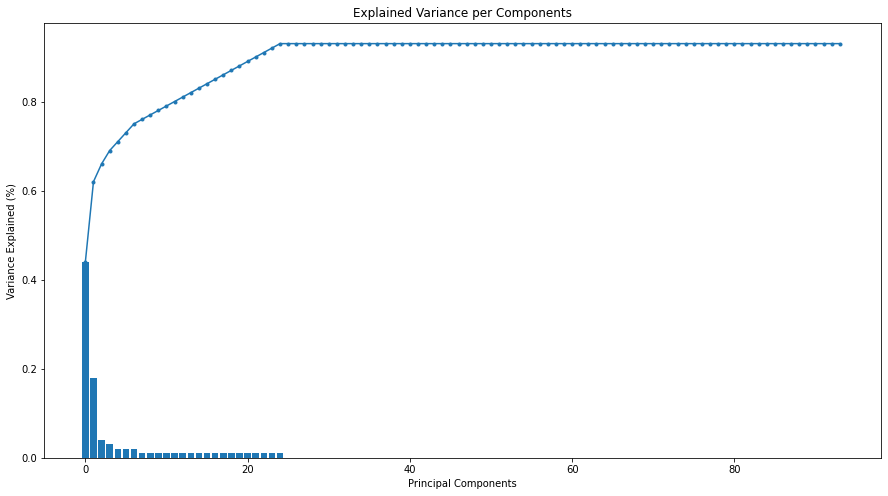

In [ ]:
numeric_ansur = ansur.select_dtypes(include="number")
pca, pc_data = run_pca(numeric_ansur)
scree_plot(pca, annotate=False)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.44051665, 0.6207369 , 0.66252678, 0.69486579, 0.71754914,
       0.73849819, 0.75717598, 0.7718894 , 0.78598026, 0.79918369,
       0.81146733, 0.82295776, 0.83218687, 0.84131191, 0.85012807,
       0.8584072 , 0.86626997, 0.87345694, 0.88040077, 0.88693017,
       0.89313427, 0.89900015, 0.9046645 , 0.91003408, 0.91521265,
       0.92007299, 0.92458209, 0.9287637 , 0.9327456 , 0.93635863,
       0.93979365, 0.94298154, 0.94603209, 0.94880433, 0.95152607,
       0.9540111 , 0.95640306, 0.95870962, 0.96087257, 0.96291628,
       0.96488515, 0.96675178, 0.96851133, 0.97016858, 0.97176077,
       0.97331303, 0.97479361, 0.97622924, 0.9776409 , 0.97900449,
       0.98022451, 0.98138946, 0.98249926, 0.98355688, 0.98454696,
       0.98551067, 0.98639188, 0.98721166, 0.98802543, 0.98878359,
       0.98946938, 0.99014669, 0.99077661, 0.99139148, 0.99198534,
       0.99251544, 0.99303261, 0.99354199, 0.99403625, 0.9945038 ,
       0.99495589, 0.99538746, 0.99578629, 0.99615423, 0.99650

Dari visualisasi diatas, terihat bahwa kita sebenarnya cukup menggunakan kurang dari 20 principal components untuk mempertahankan 90% informasi dari data. Kita akan coba gunakan lebih sedikit principal components.

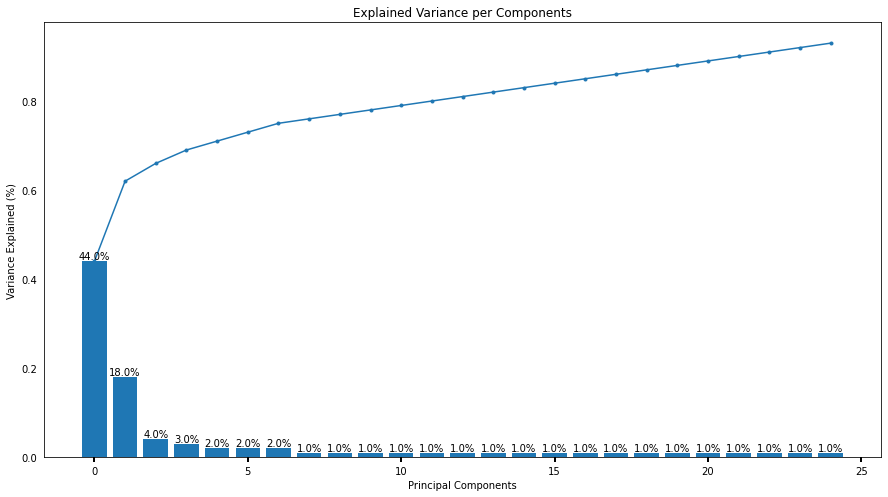

In [ ]:
pca, pc_data = run_pca(numeric_ansur, n_components=25)
scree_plot(pca, annotate=True)

In [ ]:
sc_ansur = StandardScaler().fit_transform(ansur.select_dtypes(include="number"))
rf_ori = RandomForestClassifier(n_estimators=5).fit(sc_ansur, ansur["Gender"])
preds = rf_ori.predict(sc_ansur)
print(classification_report(ansur["Gender"], preds))

              precision    recall  f1-score   support

        Male       1.00      1.00      1.00      4082

    accuracy                           1.00      4082
   macro avg       1.00      1.00      1.00      4082
weighted avg       1.00      1.00      1.00      4082



In [ ]:
rf_ori = RandomForestClassifier(n_estimators=5).fit(pc_data, ansur["Gender"])
preds = rf_ori.predict(pc_data)
print(classification_report(ansur["Gender"], preds))

              precision    recall  f1-score   support

        Male       1.00      1.00      1.00      4082

    accuracy                           1.00      4082
   macro avg       1.00      1.00      1.00      4082
weighted avg       1.00      1.00      1.00      4082



In [ ]:
rf_ori = RandomForestClassifier(n_estimators=5).fit(sc_ansur[:, :25], ansur["Gender"])
preds = rf_ori.predict(sc_ansur[:, :25])
print(classification_report(ansur["Gender"], preds))

              precision    recall  f1-score   support

        Male       1.00      1.00      1.00      4082

    accuracy                           1.00      4082
   macro avg       1.00      1.00      1.00      4082
weighted avg       1.00      1.00      1.00      4082



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=363f0455-0fa6-421f-8e97-78fbb3c9ab0f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>